In [221]:
import numpy as np
import seaborn as sns
import timeit
import pandas as pd
import polars as pl 

In [222]:
np.array([1,2,3,4,5]).shape

(5,)

In [223]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [224]:
np.linspace(0,5,9)

array([0.   , 0.625, 1.25 , 1.875, 2.5  , 3.125, 3.75 , 4.375, 5.   ])

In [225]:
a = np.arange(15).reshape(3,5)
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [226]:
print(np.linspace(1,10,10))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [227]:
# We are slicing by row or columns
# The first idex is the index of the row and the second is the index of the column
a[0:2,:]

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [228]:
# Here we sliced the columns by selecting the second indexes
a[:,3:5]

array([[ 3,  4],
       [ 8,  9],
       [13, 14]])

In [229]:
# Now by using :: and ::-1 operators we can reverse the order of our matrix 
# we are reversing the order of the columns because we are reverting the second index THE SECOND INDEX IS FOR THE COLUMNS
reverse_a_0 = a [:,::-1] 
print(f'{a} \n\n {reverse_a_0} \n\n\n')

#we are reversing the rows as we are reversing the first index of the matrix
reverse_a_1 = a[::-1,] 
print(f'{a} \n\n {reverse_a_1}')



[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 

 [[ 4  3  2  1  0]
 [ 9  8  7  6  5]
 [14 13 12 11 10]] 



[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 

 [[10 11 12 13 14]
 [ 5  6  7  8  9]
 [ 0  1  2  3  4]]


In [230]:
# WE can of course slice both of the indexes 

sliced_a = a[0:2,0:2]
print(sliced_a)

[[0 1]
 [5 6]]


In [231]:
b = np.arange(15)

In [232]:
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [233]:
b.sum(axis=0)

105

In [234]:
# The sum along 0 axis means we are summing along the columns, we have 5 columns that's why we have 5 sums 
print(a)
a.sum(axis= 0)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


array([15, 18, 21, 24, 27])

In [235]:
# The sum along 1 axis means we are summing along the rows, we have 3 rows that's why we have 3 sums 
print(a)
a.sum(axis = 1)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


array([10, 35, 60])

In [236]:
# We imported the data from gitHUB and we process them using Pandas
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/marcin119a/PODSTAWY-UCZENIA-MASZYNOWEGO-W-PYTHONIE-/main/tips.csv')
df.head()

,index_of_row,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [237]:
# Now as pandas is pretty slow we convert the df to a numpy array in order to speed up the prcessing (  HAVE TO TRY .POLARS)

arr = df.to_numpy()
print(arr)

[[0 16.99 1.01 ... 'Sun' 'Dinner' 2]
 [1 10.34 1.66 ... 'Sun' 'Dinner' 3]
 [2 21.01 3.5 ... 'Sun' 'Dinner' 3]
 ...
 [241 22.67 2.0 ... 'Sat' 'Dinner' 2]
 [242 17.82 1.75 ... 'Sat' 'Dinner' 2]
 [243 18.78 3.0 ... 'Thur' 'Dinner' 2]]


In [238]:
%timeit df['total_bill'].mean()
print(df['total_bill'].mean())

38.4 µs ± 689 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
19.78594262295082


In [239]:
%timeit arr[:,1].mean()
print(arr[:,1].mean())

7.87 µs ± 186 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
19.785942622950824


In [240]:
import polars as pl

dfp = pl.read_csv('https://raw.githubusercontent.com/marcin119a/PODSTAWY-UCZENIA-MASZYNOWEGO-W-PYTHONIE-/main/tips.csv')

dfp.head()

index_of_row,total_bill,tip,sex,smoker,day,time,size
i64,f64,f64,str,str,str,str,i64
0,16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2
1,10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3
2,21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3
3,23.68,3.31,"""Male""","""No""","""Sun""","""Dinner""",2
4,24.59,3.61,"""Female""","""No""","""Sun""","""Dinner""",4


In [241]:
time_polars = timeit.timeit(lambda: dfp['total_bill'].mean(), number=1000000)
print(time_polars)

1.0231270999938715


In [242]:
time_pandas = timeit.timeit(lambda: df['total_bill'].mean(), number=1000000)
print(time_pandas)

39.28133729999536


In [243]:
time_numpy = timeit.timeit(lambda: arr[:,1].mean(), number=1000000)
print(time_numpy)

8.989375999983167


Broadcasting arrays on order to perform operations

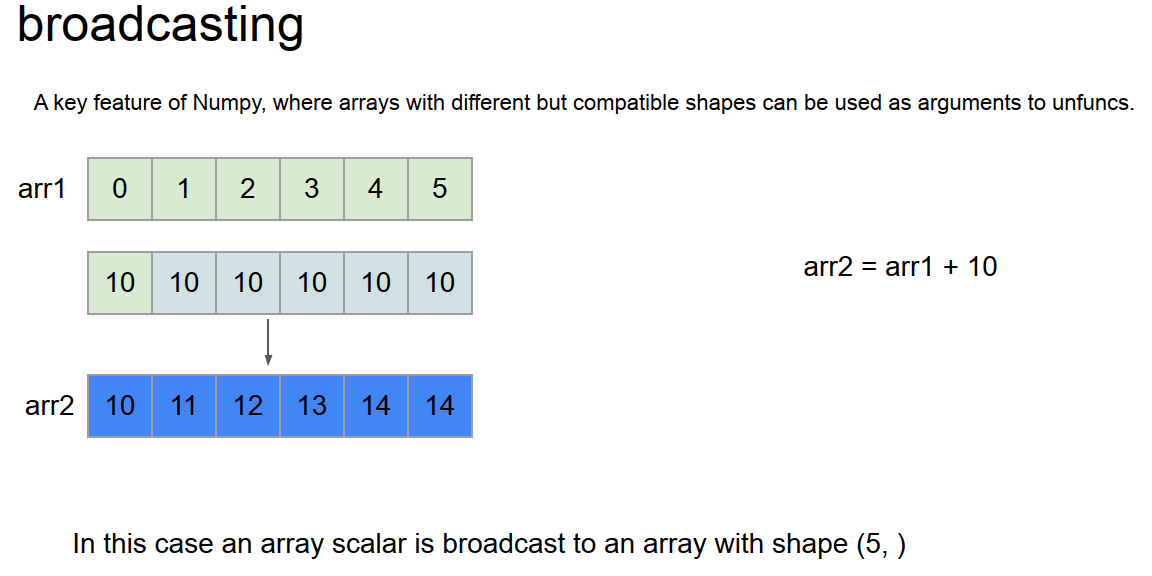

In [244]:
# LEt's try some broadcasting just to see how it works
a = np.arange(5)
b = 10

print(a)
print(a + b)

[0 1 2 3 4]
[10 11 12 13 14]


In [245]:
# We created an arbitrary matrix and than summed a scalar to that, the result is that the scalar was added to every element of the matrix
a = np.array([[1,2], [3,4]])
print(a)
             
c = a + 1 
print(c)

[[1 2]
 [3 4]]
[[2 3]
 [4 5]]


In [246]:
# when it doesn,t work? When we dont have compatible dimensions for our arrays

a = np.array([[1,2,3], [4,5,6]])
b = np.array([1,1])

c = a + b  # we wll get an error as the shapes are not compatible, in this case a has 2 rows and b has just 1 row, there is no possibility to perform the calcs
 

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

Here we use the numpy new.axis to add a new axis to the b array in order to perform the calcs

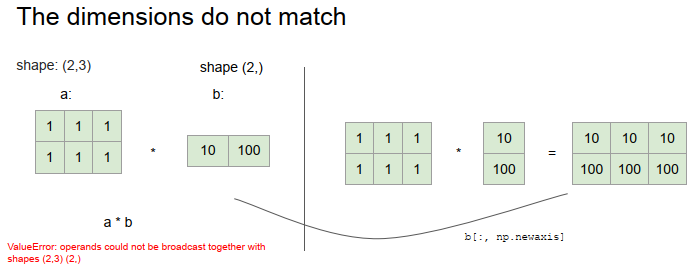

In [ ]:
# we can try to arange the b vector( array) in order to make it possible to perform operations with a 

a = np.array([[1,2,3], [4,5,6]])
b = np.array([1,1])

b = b[:,np.newaxis]

print(f'a = {a} \n\n b = {b} \n\n a+b = {a+b}') # now the operation is possible as a and b have the same number of rows. The fundamental part is that the y have to have the same number of rows in this case
 

a = [[1 2 3]
 [4 5 6]] 

 b = [[1]
 [1]] 

 a+b = [[2 3 4]
 [5 6 7]]


In [ ]:
a = np.array([[1,2,3], [4,5,6]])

a = a[np.newaxis, :]
print(a)

SyntaxError: cannot assign to attribute here. Maybe you meant '==' instead of '='? (2805589742.py, line 3)

Array reduction methods

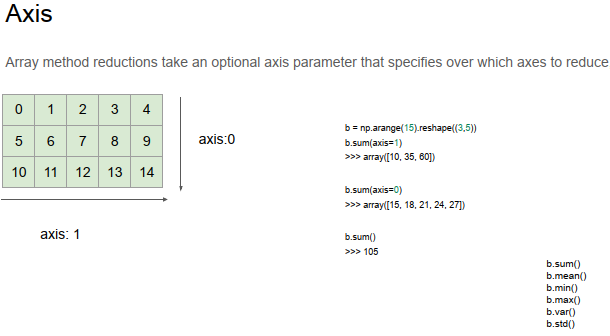

In [ ]:
# we can specify the axis that we want to take into account when performing a reduction of the array. 

a = np.ones(shape = (3,5))

b = np.array([[1,2,3,1,1],[0,4,2,0,0],[1,2,9,6,0]])

c = a + b

# all the operation below are first performed along the rows than along the columns, it's a good way to compact the results
print(f'Array = {c}')
print(f'Row sum = {a.sum(axis = 0)}')
print(f'Col sum = {a.sum(axis = 1)}')
print(f'Row mean = {a.mean(axis = 0)}')
print(f'Col mean = {a.mean(axis = 1)}')
print(f'Row max = {c.max(axis = 0)}')
print(f'Col max = {c.max(axis = 1)}')


Array = [[ 2.  3.  4.  2.  2.]
 [ 1.  5.  3.  1.  1.]
 [ 2.  3. 10.  7.  1.]]
Row sum = [3. 3. 3. 3. 3.]
Col sum = [5. 5. 5.]
Row mean = [1. 1. 1. 1. 1.]
Col mean = [1. 1. 1.]
Row max = [ 2.  5. 10.  7.  2.]
Col max = [ 4.  5. 10.]


# Zadania z Leckji 4

In [ ]:
# Defining a 10 number array

a = np.linspace(0,9,10)
print(a)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [ ]:
# Squarinng all the numbers and then summing the result about the 2 axes 
print(a ** 2)
np.sum(a ** 2, axis = 0)
np.sum(a ** 2) # if the arra is "one dimensional" we just have to ipunt sum instead of axes = 1 to obtain the sum

[ 0.  1.  4.  9. 16. 25. 36. 49. 64. 81.]


285.0

In [ ]:
# reshaped the array and performed the sum along the 2 axes 
b = a.reshape(2,5)

print(b)

print(b.sum(axis = 1))
print(b.sum(axis = 0))

[[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]
[10. 35.]
[ 5.  7.  9. 11. 13.]


# Mnist Dataset 

In [338]:
# We imported the mnist dataset
from numpy import genfromtxt

mnist_dataset = genfromtxt('https://media.githubusercontent.com/media/jakub-braja/Podstawy-uczenia-maszynowego/667a1ac9ba301124aca8a8b4f11bf4bc098ebcc4/MNIST/mnist_test.csv', delimiter=',')

# Instead of removing everytime the last element of the array i can directly remove the last column of the mnist_dataset
mnist_dataset = mnist_dataset[:,:-1]
print(len(mnist_dataset))

10000


In [339]:
print(len(mnist_dataset))

10000


In [340]:
# The shape of the dataset is 0,785 meaning that we have 785 columns


print(mnist_dataset[0].shape)
print(len(mnist_dataset[0]))

(784,)
784


In [341]:
784/2


392.0

In [342]:
# we are removing the last element of the dataset in order to have an element that is 784 long ( we need that in order to reshape the element)
ten_1 = mnist_dataset[0]

In [343]:
# we are reshaping the tensor in order to have the image, i could reshape it to (2,392) but the image is planned to be 28 * 28
ten_1 = ten_1.reshape(28,28)

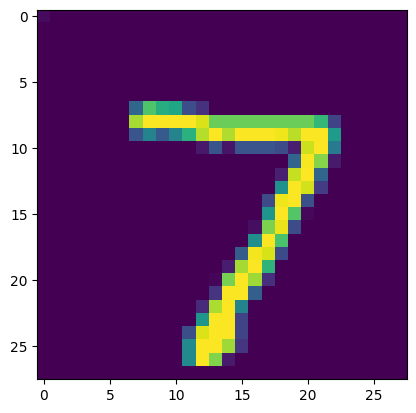

In [344]:
import matplotlib.pyplot as plt

plt.imshow(ten_1, cmap=None)

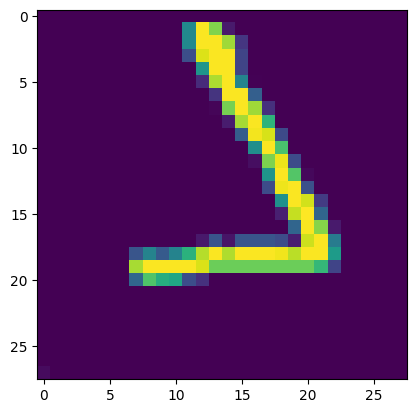

In [345]:
plt.imshow(ten_1[::-1], cmap=None) # [::-1] this reverse the order or the rows

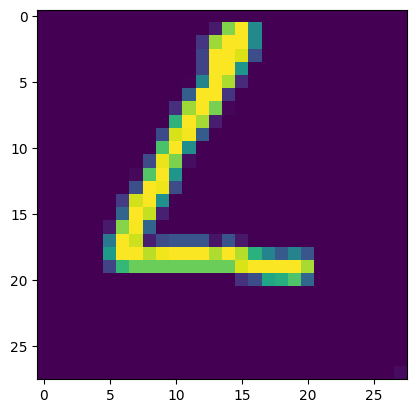

In [346]:
plt.imshow(ten_1[::-1,::-1], cmap=None)  # Here we are reversing the order of the rows and the columns

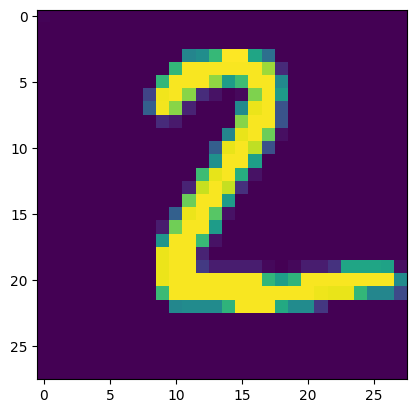

In [347]:
ten_2 = mnist_dataset[1].reshape(28,28)

plt.imshow(ten_2, cmap=None)

In [348]:
# We ar esumming the number of cells that are bigger than 220
(ten_2 > 220).sum()

79

AxesImage(size=(28, 28))
AxesImage(size=(28, 28))


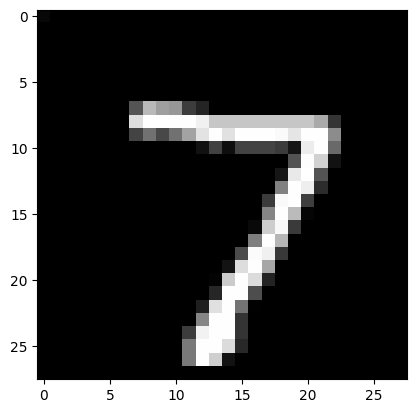

In [349]:
# We subtracted the value of the 'pixels' from 255 to reverse the colors of the image. We cn use the grayscale if we want to 
print(plt.imshow(255-ten_1, cmap='gray'))
print(plt.imshow(ten_1, cmap='gray'))

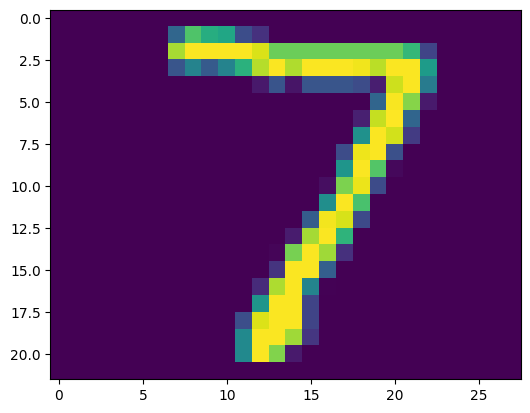

In [350]:
# we cropped the first 6 top rows of the image just to show how slicing works in tis case 
ten_1b = ten_1[6:,:]
plt.imshow(ten_1b, cmap=None)

# Zadajnia MNIST Lekcja 4 

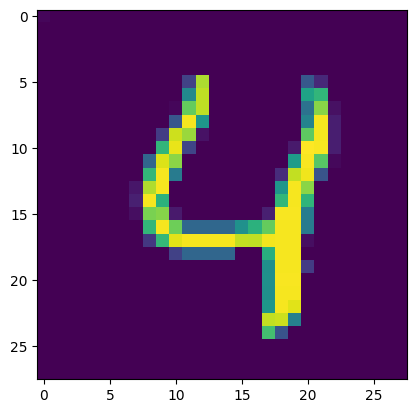

In [351]:
# Wczytaj mnist i sprawdz ile pikseli "4" ma > 120 
ten_4 = mnist_dataset[4].reshape(28,28)
plt.imshow(ten_4, cmap=None)

In [352]:
# Check how many pixels are above 120
(ten_4 > 120).sum()

79

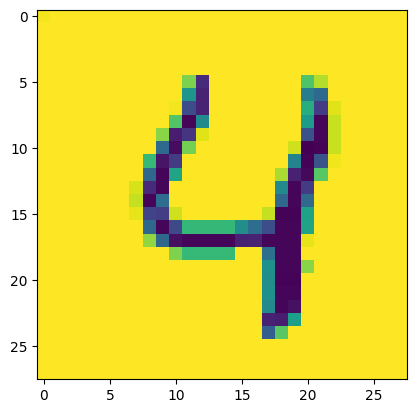

In [353]:
# we plotted teh negative of the number "4"
plt.imshow(255 - ten_4, cmap = None)

In [354]:
# We evaluate the Mean and the std of the number "4"
print(f'Average: {ten_4.mean()}\nSTD:{ten_4.std()} ')

Average: 24.542091836734695
STD:66.90677159615562 


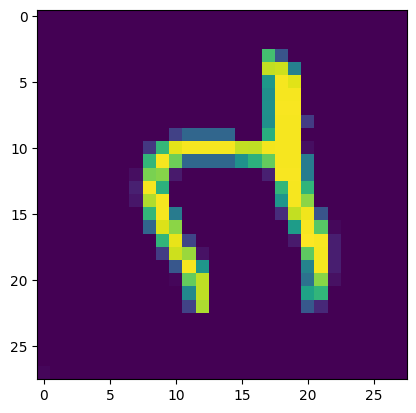

In [355]:
# WE reverse the number with respect to the x-axis

ten_4b = ten_4[::-1,:]

plt.imshow(ten_4b,cmap = None)

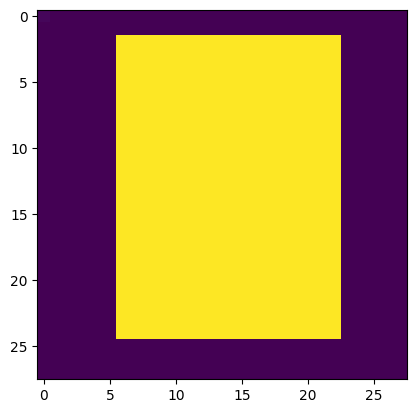

In [356]:
# Draw a square that covers the "4"
import copy as cp
ten_5 = cp.deepcopy(ten_4)
ten_5[2:25,6:23] = 255 
plt.imshow(ten_5, cmap = None)

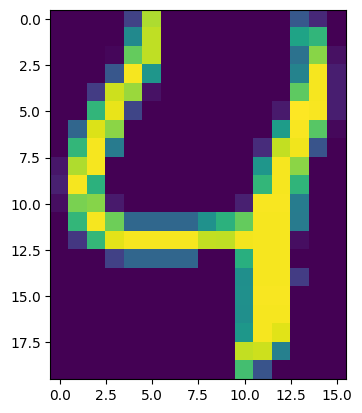

In [365]:
# Crop the image to show literrally the minimum necesary

ten_4 = mnist_dataset[4].reshape(28,28)


plt.imshow(ten_4[5:25,7:23], cmap = None)


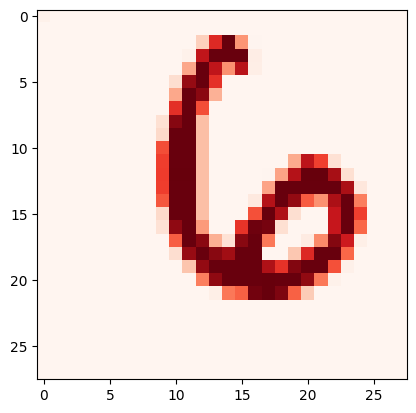

In [375]:
# Import your new number and plot it 

ten_6 = mnist_dataset[88].reshape(28,28)


plt.imshow(ten_6, cmap = 'Reds')

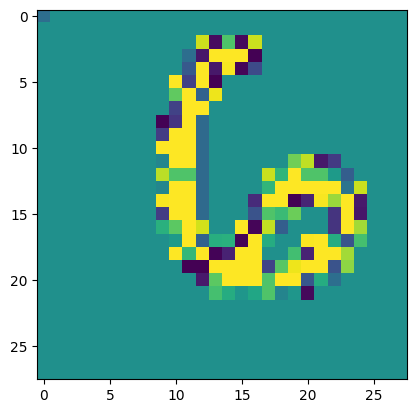

In [387]:
#apply the sin to ypur tensor ans explain what is heppening

ten_6_sin = np.sin(ten_6)

plt.imshow(ten_6_sin, cmap = None)

# it looks like this as sin(0) = 0 and all the other values the sin takes them and gives the sin(number) since our numbers are in the range 0 -255 it can varies deeply

In [385]:

def sigmoid(z):
  
    return 1 / (1 + np.exp(-z))



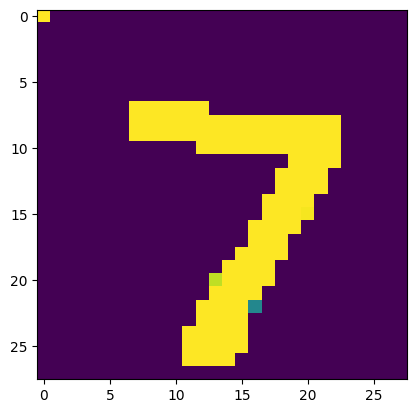

In [388]:
ten_1_sin = sigmoid(ten_1)

plt.imshow(ten_1_sin, cmap = None)

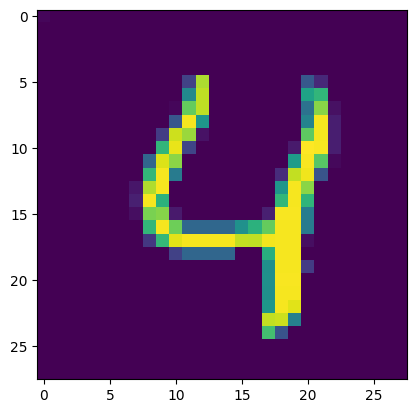

In [394]:
ten_4 = mnist_dataset[4].reshape(28,28)
plt.imshow(ten_4, cmap = None)

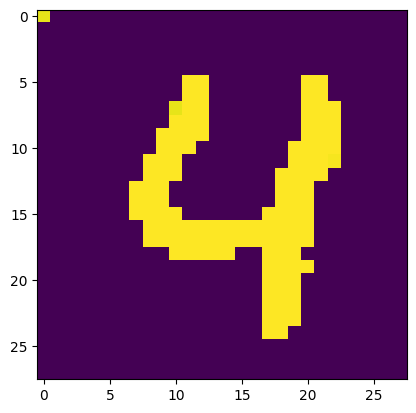

In [395]:
plt.imshow(sigmoid(ten_4), cmap = None)